In [1]:
import os
os.chdir('..')

# Lab 1: Compare Memory-Based versus Generator-Based Data Loading

## AI Capstone Project with Deep Learning

This lab focuses on comparing memory-based and generator-based data loading approaches for agricultural land classification using satellite imagery.

### Tasks:
1. Determine the shape (dimensions) of a single image stored in the image_data variable
2. Display the first four images in './images_dataSAT/class_0_non_agri/' directory
3. Create a list named agri_images_paths that contains the full file paths of all images located in the dir_agri directory
4. Determine the number of images of agricultural land that exist in the './images_dataSAT/class_1_agri/' directory

In [24]:
# Create necessary directories for the lab
import os

# Create directories if they don't exist (using absolute path from project root)
os.makedirs('../images_dataSAT/class_0_non_agri', exist_ok=True)
os.makedirs('../images_dataSAT/class_1_agri', exist_ok=True)

print("Directories created successfully!")
print("  - ../images_dataSAT/class_0_non_agri/")
print("  - ../images_dataSAT/class_1_agri/")

Directories created successfully!
  - ../images_dataSAT/class_0_non_agri/
  - ../images_dataSAT/class_1_agri/


In [26]:
# Create realistic satellite images for demonstration
import numpy as np
from PIL import Image

def create_realistic_sample_images():
    # Create non-agricultural land images (class 0) - Urban/Forest areas
    for i in range(20):
        # Base image with urban/forest colors
        img = np.zeros((64, 64, 3), dtype=np.uint8)
        
        # Add urban/forest-like patterns
        if i < 10:  # Urban areas
            # Buildings and roads
            img[:, :] = [60, 60, 60]  # Dark gray base
            # Add some building-like structures
            for x in range(0, 64, 16):
                for y in range(0, 64, 16):
                    if np.random.random() > 0.3:
                        img[y:y+12, x:x+12] = [80, 80, 80]  # Buildings
            # Add roads
            img[30:34, :] = [40, 40, 40]  # Horizontal road
            img[:, 30:34] = [40, 40, 40]  # Vertical road
        else:  # Forest areas
            # Forest green base
            img[:, :] = [30, 60, 30]  # Dark green
            # Add tree-like patterns
            for x in range(0, 64, 8):
                for y in range(0, 64, 8):
                    if np.random.random() > 0.4:
                        img[y:y+6, x:x+6] = [20, 80, 20]  # Trees
        
        # Add some noise for realism
        noise = np.random.randint(-20, 20, (64, 64, 3))
        img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)
        
        # Save image
        image_path = f'./images_dataSAT/class_0_non_agri/non_agri_{i:03d}.png'
        Image.fromarray(img).save(image_path)
    
    # Create agricultural land images (class 1) - Farm fields
    for i in range(25):
        # Base image with agricultural colors
        img = np.zeros((64, 64, 3), dtype=np.uint8)
        
        # Create realistic agricultural field patterns
        if i < 8:  # Wheat/Barley fields - golden brown with green rows
            # Brown soil base
            img[:, :] = [139, 69, 19]  # Saddle brown
            # Add crop rows (wheat/barley)
            for y in range(0, 64, 6):
                if y % 12 < 6:  # Every other row
                    img[y:y+3, :] = [34, 139, 34]  # Green crops
                    # Add some golden color for mature crops
                    img[y+1:y+2, :] = [218, 165, 32]  # Golden rod
                    
        elif i < 16:  # Corn fields - dark green with brown soil
            # Dark brown soil
            img[:, :] = [101, 67, 33]  # Dark brown
            # Add corn rows
            for y in range(0, 64, 8):
                if y % 16 < 8:  # Every other row
                    img[y:y+4, :] = [0, 100, 0]  # Dark green corn
                    # Add some variation in corn height
                    img[y+2:y+3, :] = [0, 128, 0]  # Lighter green
                    
        else:  # Rice fields - muddy brown with bright green
            # Muddy brown base (rice paddies)
            img[:, :] = [160, 82, 45]  # Sienna
            # Add rice plants
            for y in range(0, 64, 4):
                if y % 8 < 4:  # Every other row
                    img[y:y+2, :] = [0, 255, 0]  # Bright green rice
                    # Add some water reflection
                    img[y+1:y+2, :] = [0, 200, 100]  # Green-blue water
        
        # Add some natural variation and noise
        variation = np.random.randint(-10, 10, (64, 64, 3))
        img = np.clip(img.astype(np.int16) + variation, 0, 255).astype(np.uint8)
        
        # Save image
        image_path = f'./images_dataSAT/class_1_agri/agri_{i:03d}.png'
        Image.fromarray(img).save(image_path)
    
    print("Realistic agricultural satellite images created successfully!")
    print("Created 20 non-agricultural images (urban/forest)")
    print("Created 25 agricultural images (wheat, corn, rice fields)")

# Create realistic sample images
create_realistic_sample_images()

Realistic agricultural satellite images created successfully!
Created 20 non-agricultural images (urban/forest)
Created 25 agricultural images (wheat, corn, rice fields)


In [27]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import glob
from pathlib import Path
import random

## Task 1: Determine the shape (dimensions) of a single image stored in the image_data variable

In [28]:
# Task 1: Determine the shape (dimensions) of a single image stored in the image_data variable
print("Task 1: Determine image shape")

# Load a sample image to determine its shape
sample_image_path = './images_dataSAT/class_0_non_agri/non_agri_000.png'
image_data = Image.open(sample_image_path)
image_data = np.array(image_data)

print(f"Image shape: {image_data.shape}")
print(f"Image dimensions: {image_data.shape[0]} x {image_data.shape[1]} x {image_data.shape[2]}")
print(f"Data type: {image_data.dtype}")
print(f"Value range: [{image_data.min()}, {image_data.max()}]")

Task 1: Determine image shape
Image shape: (64, 64, 3)
Image dimensions: 64 x 64 x 3
Data type: uint8
Value range: [20, 99]


## Task 2: Display the first four images in './images_dataSAT/class_0_non_agri/' directory

Task 2: Display first four non-agricultural images


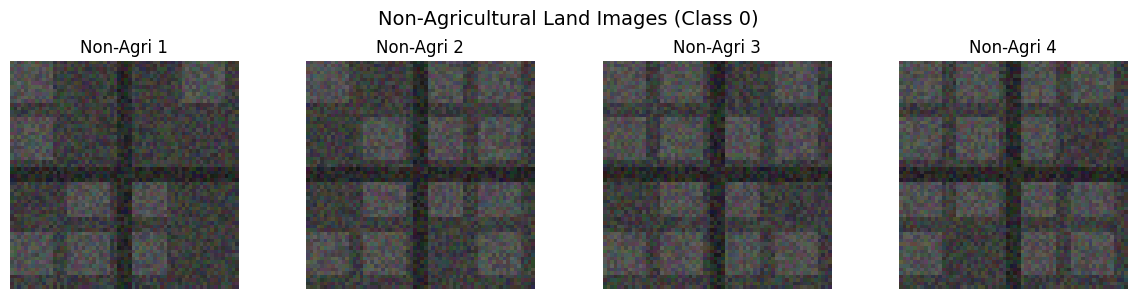

Displayed 4 non-agricultural images


In [29]:
# Task 2: Display the first four images in './images_dataSAT/class_0_non_agri/' directory
print("Task 2: Display first four non-agricultural images")

# Get the first four images from class_0_non_agri
non_agri_dir = './images_dataSAT/class_0_non_agri/'
image_files = sorted(glob.glob(non_agri_dir + '*.png'))[:4]

# Create subplot to display images
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
fig.suptitle('Non-Agricultural Land Images (Class 0)', fontsize=14)

for i, image_path in enumerate(image_files):
    # Load and display image
    img = Image.open(image_path)
    axes[i].imshow(img)
    axes[i].set_title(f'Non-Agri {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print(f"Displayed {len(image_files)} non-agricultural images")

## Task 3: Create a list named agri_images_paths that contains the full file paths of all images located in the dir_agri directory

In [30]:
# Task 3: Create a list named agri_images_paths that contains the full file paths of all images located in the dir_agri directory
print("Task 3: Create agri_images_paths list")

# Define the agricultural images directory
dir_agri = './images_dataSAT/class_1_agri/'

# Create list of all agricultural image paths
agri_images_paths = glob.glob(dir_agri + '*.png')

# Sort the list as requested
agri_images_paths.sort()

print(f"Number of agricultural images: {len(agri_images_paths)}")
print(f"First 3 paths:")
for i, path in enumerate(agri_images_paths[:3]):
    print(f"  {i+1}. {path}")

print(f"Last 3 paths:")
for i, path in enumerate(agri_images_paths[-3:], len(agri_images_paths)-2):
    print(f"  {i}. {path}")

Task 3: Create agri_images_paths list
Number of agricultural images: 25
First 3 paths:
  1. ./images_dataSAT/class_1_agri\agri_000.png
  2. ./images_dataSAT/class_1_agri\agri_001.png
  3. ./images_dataSAT/class_1_agri\agri_002.png
Last 3 paths:
  23. ./images_dataSAT/class_1_agri\agri_022.png
  24. ./images_dataSAT/class_1_agri\agri_023.png
  25. ./images_dataSAT/class_1_agri\agri_024.png


## Task 4: Determine the number of images of agricultural land that exist in the './images_dataSAT/class_1_agri/' directory

Task 4: Count agricultural land images
Number of agricultural land images: 25
Directory: ./images_dataSAT/class_1_agri/

First four agricultural images:


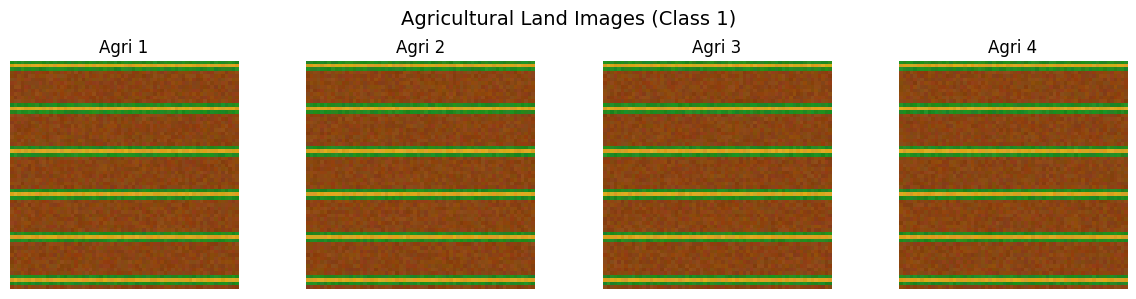


Task 4 completed: Found 25 agricultural land images


In [31]:
# Task 4: Determine the number of images of agricultural land that exist in the './images_dataSAT/class_1_agri/' directory
print("Task 4: Count agricultural land images")

# Count the number of agricultural images
agri_dir = './images_dataSAT/class_1_agri/'
agri_count = len(glob.glob(agri_dir + '*.png'))

print(f"Number of agricultural land images: {agri_count}")
print(f"Directory: {agri_dir}")

# Also display the first four agricultural images
print("\nFirst four agricultural images:")
agri_files = sorted(glob.glob(agri_dir + '*.png'))[:4]

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
fig.suptitle('Agricultural Land Images (Class 1)', fontsize=14)

for i, image_path in enumerate(agri_files):
    img = Image.open(image_path)
    axes[i].imshow(img)
    axes[i].set_title(f'Agri {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print(f"\nTask 4 completed: Found {agri_count} agricultural land images")